<a href="https://colab.research.google.com/github/girlstalkmath-umd/patterns-and-fractals/blob/master/Julia_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Julia Set

If we iterate a function, $f$ from some starting point, $z_0$ one of the following must happen:

* The orbit of $z_0$ diverges (goes towards infinity),
* The orbit of $z_0$ stays bounded.

We will define the Filled Julia set as the set of complex numbers who’s orbits stay bounded under iteration and the Julia set is the set is the boundary of the filled Julia set. For the function $f(z) = z^2$ the filled Julia set is the unit disk (so all complex numbers who’s norm is less than or equal to 1) and the Julia set is the unit circle (the set of all complex numbers with norm equal to 1).

A property of the family $z^2 +c$ is that if $|z| ≥ |c|$ and $|z| > 2$ then the orbit of $z$ will diverge. We can use this for an algorithm to plot the Julia set! The idea is that we choose a rectangular grid of complex numbers and iterate from each until either 
* the absolute value of the iterate gets bigger than the max of 2 and $|c|$ and color the starting point according to how quickly this happened or 
* we reach some specified bailout number and color the point black (without this, we would get into a loop where the previous condition is never satisfied so the command would never stop trying to run).

Let us try to write the code to find the Julia Set of $z^2 + c$ one step at a time.

First, we will import some python libraries that we expect we will need. Go ahead and google "numpy" and "matplotlib" and try to figure out what these libraries do.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Now let us define the size of the domain over which we want to find the Julia Set using two parameters, im_width and im_height (the width and the height of the rectangular domain for our Julia Set).

In [0]:
# Image width and height; parameters for the plot
im_width, im_height = 500, 500

The parameter $c$ for the Julia set. Set the parameter $c$ to the complex number $c = -0.1 + 0.65i$

In [0]:
c =  complex(-0.1,0.65) # set the value of c

Some more parameters that you should try to understand using the comments:

In [0]:
zabs_max = 10  # if z crosses zabs_max, we call this the bailout condition and color the point black.
nit_max = 1000 # maximum number of iterations
xmin, xmax = -1.5, 1.5 # x limits of our domain in the complex plane
xwidth = xmax - xmin # width of our domain in the complex plane
ymin, ymax = -1.5, 1.5 # y limits of our domain in the complex plane
yheight = ymax - ymin # height of our domain in the complex plane


### Important: In the next block of code, you should add the function $z = z^2 + c$ to iterate the numbers. Do this, then run the plotting cell below to view your Julia set.

In [0]:
julia = np.zeros((im_width, im_height))

for ix in range(im_width):
    for iy in range(im_height):
        nit = 0
        # Map pixel position to a point in the complex plane
        z = complex(ix / im_width * xwidth + xmin,
                    iy / im_height * yheight + ymin)
        # Do the iterations
        while abs(z) <= zabs_max and nit < nit_max:
            # do the iteration (z = z**2 + c)
            nit += 1
        ratio = nit / nit_max
        julia[ix,iy] = ratio

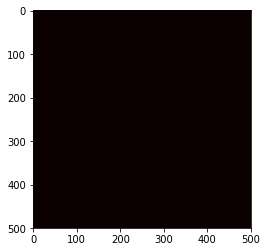

In [0]:
%matplotlib inline
#plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(julia, interpolation='nearest', cmap=cm.hot)
# Set the tick labels to the coordinates of z0 in the complex plane
plt.show()

As a bonus, fun exercise, generate the Julia set for the following values of $c$

* 0.79 + 1.5i
* 0.162 + 1.04i
* 0.3 - 0.01i
* -1.476 + 0i
* -0.12 - 0.77i
* 0.28 + 0.008i

To make this easier, let us define a function JuliaSet which takes in $c$ as an argument and plots the Julia Set for that value of $c$

In [0]:
def JuliaSet(c):
    
    im_width, im_height = 2000, 2000
    zabs_max = 10  # if z crosses zabs_max, we call this the bailout condition and color the point black.
    nit_max = 1000 # maximum number of iterations
    xmin, xmax = -1.5, 1.5 # x limits of our domain in the complex plane
    xwidth = xmax - xmin # width of our domain in the complex plane
    ymin, ymax = -1.5, 1.5 # y limits of our domain in the complex plane
    yheight = ymax - ymin # height of our domain in the complex plane


    julia = np.zeros((im_width, im_height))

    for ix in range(im_width):
        for iy in range(im_height):
            nit = 0
            # Map pixel position to a point in the complex plane
            z = complex(ix / im_width * xwidth + xmin,
                        iy / im_height * yheight + ymin)
            # Do the iterations
            while abs(z) <= zabs_max and nit < nit_max:
                z = z**2 + c
                nit += 1
            ratio = nit / nit_max
            julia[ix,iy] = ratio
    
    return(julia)

In [0]:
julia = JuliaSet(complex(0.3, -0.01))

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.imshow(julia, interpolation='nearest', cmap=cm.hot)
# Set the tick labels to the coordinates of z0 in the complex plane
plt.show()